In [57]:
import numpy as np
import matplotlib.pyplot as plt
from files.functions.results_extractors import *
import seaborn as sns
sns.set()
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.serif": ["Palatino"]})


In [58]:
def isfloat(s):
    try:
        float(s)
        return True
    except:
        return False


In [59]:
def get_thresholds_aucs(dic):
    thresholds, aucs = [], []
    for threshold, dict3 in dic.items():
        if isfloat(threshold):
            thresholds.append(float(threshold))
            aucs.append(dict3['roc_auc'])

    idxs = np.argsort(thresholds)
    thresholds = np.array(thresholds)[idxs]
    aucs = np.array(aucs)[idxs]
    return np.dstack((thresholds, aucs))[0]


In [60]:
base_path = r"/home/catonz/Neural-PreferenceIsolation/server/results/ae_24142/"


def make_aucs_thresholds_plots(base_path, to_plot=False, to_save=False):
    dirs = [p for p in os.listdir(base_path) if "test" in p]
    params_results = np.array([[read_dict_json(path=joinpath(
        base_path, d, "parameters.json")), extract_results_models(joinpath(base_path, d))] for d in dirs])

    # sort based on mss values. From smaller to bigger
    params_results = params_results[np.argsort(
        list(map(lambda x: x["mss"], params_results[:, 0])))]

    std_multiples = [1, 4, 7, 10, 25, 50, 100]
    sigma = r"$\sigma$"
    psi = r"$\rho$"
    tau = r"$\tau$"
    maxes = {}
    for model, dict1 in params_results[0, 1].items():
        for ds_name, dict2 in dict1.items():
            fig = plt.figure(dpi=100, figsize=(10, 7))
            name = ds_name.replace("_", "-")
            if "parable" in name:
                name = "parables"
            if "lines" in name:
                name = "lines"
            fig.suptitle(
                f"Dataset: {name}. {sigma} = {params_results[0, 0]['datasets_std'][ds_name]}", fontsize=20, y=0.93)

            all_aucs = np.array([])
            for params, results in params_results:
                res = get_thresholds_aucs(results[model][ds_name])
                thresholds, aucs = res[:, 0], res[:, 1]
                plt.plot(thresholds, aucs, marker=".",
                         label=f"{psi} = {params['mss']}", )
                all_aucs = np.append(all_aucs, aucs)

            min_y = np.min(all_aucs)
            max_y = np.max(all_aucs)
            maxes[ds_name] = max_y

            plt.xlabel(f"Threshold ({tau})")
            plt.ylabel("AUC")
            plt.gca().yaxis.set_label_position("right")

            # plt.ylim(min_y - 0.01, max_y + 0.01)
            plt.xticks(thresholds, labels=[
                       f"{i}*{sigma}" for i in std_multiples], rotation=45, fontsize=10)

            # plt.yticks(np.linspace(min_y, max_y, 9))
            plt.ylim(min(min_y-0.05, 0.5), 1)
            plt.yticks(np.linspace(0.5, 1, 9))
            plt.legend(loc="lower right")

            if to_plot:
                plt.show()
            if to_save:
                save_path = joinpath(base_path, "ds_aucs_plots")
                os.makedirs(save_path, exist_ok=True)
                fig.savefig(
                    joinpath(save_path, f"{ds_name}.svg"), bbox_inches="tight")
            plt.close()
        return maxes


In [61]:
base_path = r"/home/catonz/Neural-PreferenceIsolation/server/results/2d/ae_24142/"
best_ae_24142 = make_aucs_thresholds_plots(base_path, to_save=True)
best_ae_24142


{'circle4': 0.65615,
 'star11': 0.7728760330578512,
 'star5': 0.8063359999999999,
 'circles_parable3': 0.9065861111111111,
 'circle5': 0.6599280000000001,
 'stair4': 0.95735,
 'lines_rects4': 0.9144833333333333,
 'circle3': 0.8654600000000001,
 'stair3': 0.96781875}

In [62]:
base_path = r"/home/catonz/Neural-PreferenceIsolation/server/results/2d/ae_2841482/"
best_ae_2841482 = make_aucs_thresholds_plots(base_path, to_save=True)
best_ae_2841482


{'circle4': 0.688925,
 'star11': 0.7752859504132231,
 'star5': 0.82864,
 'circles_parable3': 0.9199583333333333,
 'circle5': 0.688096,
 'stair4': 0.9503499999999999,
 'lines_rects4': 0.9126805555555556,
 'circle3': 0.8718319999999999,
 'stair3': 0.9718}

In [63]:
base_path = r"/home/catonz/Neural-PreferenceIsolation/server/results/2d/som_55"
som_55 = make_aucs_thresholds_plots(base_path, to_save=True)
som_55


{'circle4': 0.726275,
 'star11': 0.767702479338843,
 'star5': 0.849904,
 'circles_parable3': 0.9180694444444445,
 'circle5': 0.7248800000000002,
 'stair4': 0.9564749999999999,
 'lines_rects4': 0.9155027777777778,
 'circle3': 0.87408,
 'stair3': 0.9766124999999999}

In [64]:
base_path = r"/home/catonz/Neural-PreferenceIsolation/server/results/2d/som_110"
som_110 = make_aucs_thresholds_plots(base_path, to_save=True)
som_110


{'circle4': 0.7556750000000001,
 'star11': 0.7600942148760332,
 'star5': 0.831344,
 'circles_parable3': 0.9109027777777778,
 'circle5': 0.7107359999999998,
 'stair4': 0.9554,
 'lines_rects4': 0.9136138888888888,
 'circle3': 0.8692639999999999,
 'stair3': 0.9750812499999999}

In [65]:
base_path = r"/home/catonz/Neural-PreferenceIsolation/server/results/3d/ae_35253"
ae_352_3d = make_aucs_thresholds_plots(base_path, to_save=True)
ae_352_3d


{'plane': 0.939848, 'paraboloid': 0.8784519999999999, 'sphere': 0.828396}

In [66]:
base_path = r"/home/catonz/Neural-PreferenceIsolation/server/results/3d/ae_3952593"
ae_3952_3d = make_aucs_thresholds_plots(base_path, to_save=True)
ae_3952_3d


{'plane': 0.935624, 'paraboloid': 0.906488, 'sphere': 0.8580479999999999}

In [67]:
base_path = r"/home/catonz/Neural-PreferenceIsolation/server/results/3d/som_110"
som_110_3d = make_aucs_thresholds_plots(base_path, to_save=True)
som_110_3d


{'plane': 0.8971359999999999,
 'paraboloid': 0.8445400000000001,
 'sphere': 0.78946}

In [68]:
base_path = r"/home/catonz/Neural-PreferenceIsolation/server/results/3d/som_55"
som_55_3d = make_aucs_thresholds_plots(base_path, to_save=True)
som_55_3d


{'plane': 0.8986879999999999, 'paraboloid': 0.845392, 'sphere': 0.770876}

In [80]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_curve, auc

print("LOF:\n")

lof_aucs = []
for ds_name in ["circle3",
                "circle4",
                "circle5",
                "stair3",
                "stair4",
                "star5",
                "star11",
                "circles_parable3",
                "lines_rects4",
                "plane",
                "sphere",
                "paraboloid"]:
    ds, gt = load_dataset_by_name(
        base_path="/home/catonz/Neural-PreferenceIsolation/", name=ds_name, with_outliers=True)
    aucs = []
    for _ in range(100):
        lof = LocalOutlierFactor().fit(ds)
        scores_lof = -lof.negative_outlier_factor_
        fpr, tpr, thr = roc_curve(gt, scores_lof, pos_label=0)
        aucs.append(auc(fpr, tpr))
    lof_aucs.append(np.mean(aucs))
    print(f"{ds_name:<20} {np.mean(aucs)}")
lof_aucs = np.array(lof_aucs).reshape(-1, 1)


LOF:

circle3              0.6909599999999999
circle4              0.6096124999999999
circle5              0.5765440000000001
stair3               0.7173687500000004
stair4               0.8085750000000002
star5                0.75336
star11               0.6654710743801653
circles_parable3     0.8384597222222222
lines_rects4         0.8088597222222222
plane                0.8267240000000002
sphere               0.6900040000000002
paraboloid           0.6505679999999999


In [81]:
from sklearn.ensemble import IsolationForest as iFor
from sklearn.metrics import roc_curve, auc

print("iFor:\n")

ifor_aucs = []
for ds_name in ["circle3",
                "circle4",
                "circle5",
                "stair3",
                "stair4",
                "star5",
                "star11",
                "circles_parable3",
                "lines_rects4",
                "plane",
                "sphere",
                "paraboloid"]:
    ds, gt = load_dataset_by_name(
        base_path="/home/catonz/Neural-PreferenceIsolation/", name=ds_name, with_outliers=True)
    aucs = []
    for i in range(100):
        ifor = iFor().fit(ds)
        scores_ifor = -ifor.score_samples(ds)
        fpr, tpr, thr = roc_curve(gt, scores_ifor, pos_label=0)
        aucs.append(auc(fpr, tpr))
    ifor_aucs.append(np.mean(aucs))
    print(f"{ds_name:<20} {np.mean(aucs)}")

ifor_aucs = np.array(ifor_aucs).reshape(-1, 1)


iFor:

circle3              0.70796166
circle4              0.633142125
circle5              0.5667919200000001
stair3               0.9397045312500001
stair4               0.8890096249999999
star5                0.7314615999999999
star11               0.7423819008264464
circles_parable3     0.8133223194444443
lines_rects4         0.8183832777777776
plane                0.7223189199999999
sphere               0.58309664
paraboloid           0.7840092


In [86]:
np.mean([0.708,
         0.633,
         0.567,
         0.940,
         0.889,
         0.731,
         0.742])

0.7442857142857143

In [102]:
results_2d.argmax(axis=1)

array([5, 4, 5, 5, 2, 5, 3, 3, 5])

In [100]:
results_2d_pif = np.hstack((results_2d, np.array([0.930,
0.897,
0.780,
0.971,
0.952,
0.910,
0.796, 0.000, 0.000]).reshape(-1, 1)))

In [82]:
# results_2d = np.zeros(shape=(9, 4))
rows_names = ["circle3", "circle4", "circle5", "stair3",
              "stair4", "star5", "star11", "circles_parable3", "lines_rects4"]
results_2d = np.array([[best_ae_24142[k] for k in rows_names], [best_ae_2841482[k] for k in rows_names], [
                      som_110[k] for k in rows_names], [som_55[k] for k in rows_names]]).T
results_2d = np.hstack((lof_aucs[:-3], ifor_aucs[:-3], results_2d))
cols_names = ["LOF", "iFor", "ae_24142", "ae_2841482", "som_110", "som_55"]

results_2d.shape


(9, 6)

In [83]:
for i in range(len(rows_names)+2):
    if i == 0:
        print(f"{' ':<20}", end=" ")
        print(cols_names)
    elif i == len(rows_names)+1:
        print(f"\n{'Mean':<20}", end=" ")
        print(f"{np.around(np.mean(results_2d, axis=0), 3)}")
    else:
        print(f"{rows_names[i-1]:<20}", end=" ")
        print(f"{str(np.around(results_2d[i-1], 3))}")
# print(np.array(rows_names).reshape(-1, 1), end="")
# print(results_2d.T)


                     ['LOF', 'iFor', 'ae_24142', 'ae_2841482', 'som_110', 'som_55']
circle3              [0.691 0.708 0.865 0.872 0.869 0.874]
circle4              [0.61  0.633 0.656 0.689 0.756 0.726]
circle5              [0.577 0.567 0.66  0.688 0.711 0.725]
stair3               [0.717 0.94  0.968 0.972 0.975 0.977]
stair4               [0.809 0.889 0.957 0.95  0.955 0.956]
star5                [0.753 0.731 0.806 0.829 0.831 0.85 ]
star11               [0.665 0.742 0.773 0.775 0.76  0.768]
circles_parable3     [0.838 0.813 0.907 0.92  0.911 0.918]
lines_rects4         [0.809 0.818 0.914 0.913 0.914 0.916]

Mean                 [0.719 0.76  0.834 0.845 0.854 0.857]


In [17]:
results_3d = np.array([list(ae_352_3d.values()), list(
    ae_3952_3d.values()), list(som_110_3d.values()), list(som_55_3d.values())]).T
results_3d = np.hstack((lof_aucs[-3:], ifor_aucs[-3:], results_3d))
rows_names = list(ae_3952_3d.keys())
cols_names = ["LOF", "iFor", "ae_35253", "ae_3952593", "som_110", "som_55"]

for i in range(len(rows_names)+2):
    if i == 0:
        print(f"{' ':<20}", end=" ")
        print(cols_names)
    elif i == len(rows_names)+1:
        print(f"\n{'Mean':<20}", end=" ")
        print(f"{np.around(np.mean(results_3d, axis=0), 3)}")
    else:
        print(f"{rows_names[i-1]:<20}", end=" ")
        print(f"{np.around(results_3d[i-1], 3)}")


                     ['LOF', 'iFor', 'ae_35253', 'ae_3952593', 'som_110', 'som_55']
plane                [0.827 0.723 0.94  0.936 0.897 0.899]
paraboloid           [0.69  0.578 0.878 0.906 0.845 0.845]
sphere               [0.651 0.784 0.828 0.858 0.789 0.771]

Mean                 [0.722 0.695 0.882 0.9   0.844 0.838]


In [18]:
def make_aucs_thresholds_plots2(base_path):
    dirs = [p for p in os.listdir(base_path) if "test" in p]
    params_results = np.array([[read_dict_json(path=joinpath(
        base_path, d, "parameters.json")), extract_results_models(joinpath(base_path, d))] for d in dirs])

    # sort based on mss values. From smaller to bigger
    params_results = params_results[np.argsort(
        list(map(lambda x: x["mss"], params_results[:, 0])))]

    final_results = {}
    for model, dict1 in params_results[0, 1].items():
        for ds_name, dict2 in dict1.items():

            best_auc = -np.inf
            best_scores = []
            for i, (params, results) in enumerate(params_results):
                res = get_thresholds_aucs(results[model][ds_name])
                thresholds, aucs = res[:, 0], res[:, 1]
                if aucs.max() > best_auc:
                    best_auc = aucs.max()
                    best_scores = aucs

            final_results[ds_name] = best_scores.tolist()

    return final_results


In [19]:
base_path = r"/home/catonz/Neural-PreferenceIsolation/server/results/2d/ae_24142/"
best_ae_24142 = make_aucs_thresholds_plots2(base_path)


In [20]:
base_path = r"/home/catonz/Neural-PreferenceIsolation/server/results/2d/ae_2841482/"
best_ae_2841482 = make_aucs_thresholds_plots2(base_path)


In [21]:
base_path = r"/home/catonz/Neural-PreferenceIsolation/server/results/2d/som_55"
som_55 = make_aucs_thresholds_plots2(base_path)


In [22]:
base_path = r"/home/catonz/Neural-PreferenceIsolation/server/results/2d/som_110"
som_110 = make_aucs_thresholds_plots2(base_path)


In [23]:
base_path = r"/home/catonz/Neural-PreferenceIsolation/server/results/3d/ae_35253"
ae_352_3d = make_aucs_thresholds_plots2(base_path,)


In [24]:
base_path = r"/home/catonz/Neural-PreferenceIsolation/server/results/3d/ae_3952593"
ae_3952_3d = make_aucs_thresholds_plots2(base_path)


In [25]:
base_path = r"/home/catonz/Neural-PreferenceIsolation/server/results/3d/som_110"
som_110_3d = make_aucs_thresholds_plots2(base_path)


In [26]:
base_path = r"/home/catonz/Neural-PreferenceIsolation/server/results/3d/som_55"
som_55_3d = make_aucs_thresholds_plots2(base_path)


In [35]:
def make_final_aucs(models, to_plot=False, to_save=False):
    std_multiples = [1, 4, 7, 10, 25, 50, 100]
    sigma = r"$\sigma$"
    psi = r"$\psi$"
    tau = r"$\tau$"
    for ds_name in models[0][1].keys():
        name = ds_name.replace("_", "-")
        if "parable" in name: name = "parables"
        if "lines" in name: name = "lines"
        fig = plt.figure(dpi=100, figsize=(10, 7))
        fig.suptitle(f"Dataset: {name.replace('_', '-')}.", fontsize=20, y=0.93)
        
        all_aucs = np.array([])
        for name_m, model in models:
            plt.plot(std_multiples, model[ds_name], marker=".", label=name_m)
            all_aucs = np.append(all_aucs, model[ds_name])
        
        min_y = np.min(all_aucs)
        max_y = np.max(all_aucs)

        plt.xlabel(f"Threshold ({tau})")
        plt.ylabel("AUC")
        plt.gca().yaxis.set_label_position("right")
        
        # plt.ylim(min_y - 0.01, max_y + 0.01)
        plt.xticks(std_multiples, labels=[f"{i}*{sigma}" for i in std_multiples], rotation=45, fontsize=10)

        # plt.yticks(np.linspace(min_y, max_y, 9))
        plt.ylim(0.5, 1)
        plt.yticks(np.linspace(0.5, 1, 9))
        plt.legend(loc="lower right");

        if to_plot:
            plt.show()
        if to_save:
            save_path = joinpath(r"/home/catonz/Neural-PreferenceIsolation/server/results", "all", "comparison")
            os.makedirs(save_path, exist_ok=True)
            fig.savefig(joinpath(save_path, f"{name}_comparison.svg"), bbox_inches="tight")
        plt.close()
    

In [36]:
b = r"/home/catonz/Neural-PreferenceIsolation/server/results/2d/ae_24142/"
d = os.listdir(b)[0]
params_results = read_dict_json(path=joinpath(b, d, "parameters.json"))
params_results["datasets"]


{'circle3': '[0.006 0.024 0.042 0.06  0.15  0.3   0.6  ]',
 'circle4': '[0.004 0.016 0.028 0.04  0.1   0.2   0.4  ]',
 'circle5': '[0.003 0.012 0.021 0.03  0.075 0.15  0.3  ]',
 'circles_parable3': '[0.01 0.04 0.07 0.1  0.25 0.5  1.  ]',
 'lines_rects4': '[0.01 0.04 0.07 0.1  0.25 0.5  1.  ]',
 'stair3': '[0.003 0.012 0.021 0.03  0.075 0.15  0.3  ]',
 'stair4': '[0.004 0.016 0.028 0.04  0.1   0.2   0.4  ]',
 'star11': '[0.005 0.02  0.035 0.05  0.125 0.25  0.5  ]',
 'star5': '[0.009 0.036 0.063 0.09  0.225 0.45  0.9  ]'}

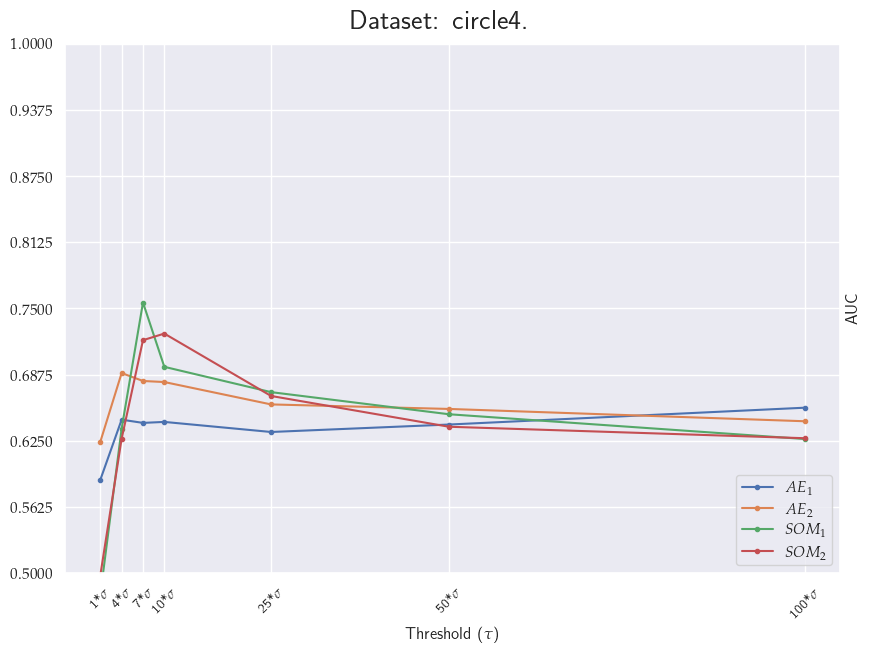

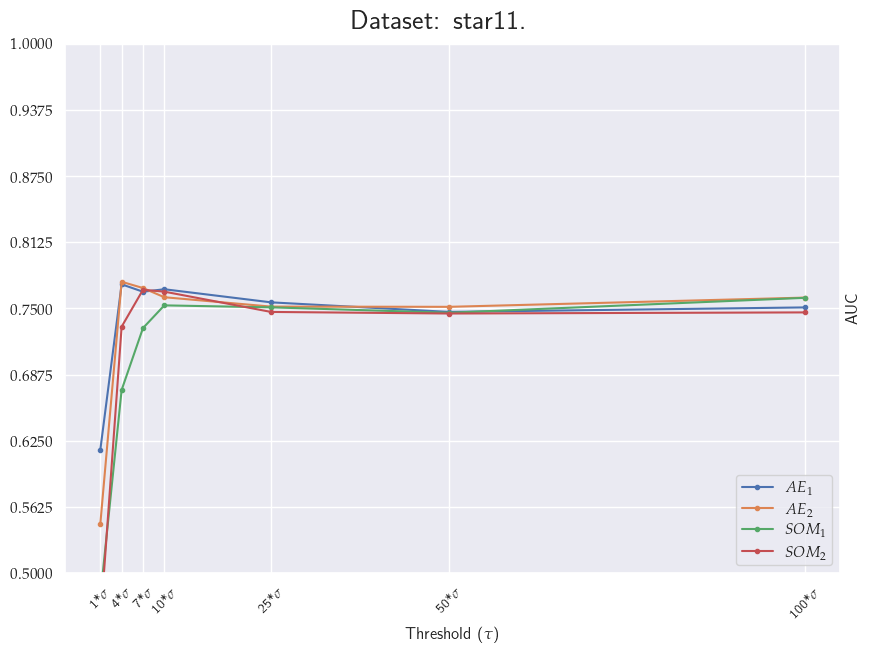

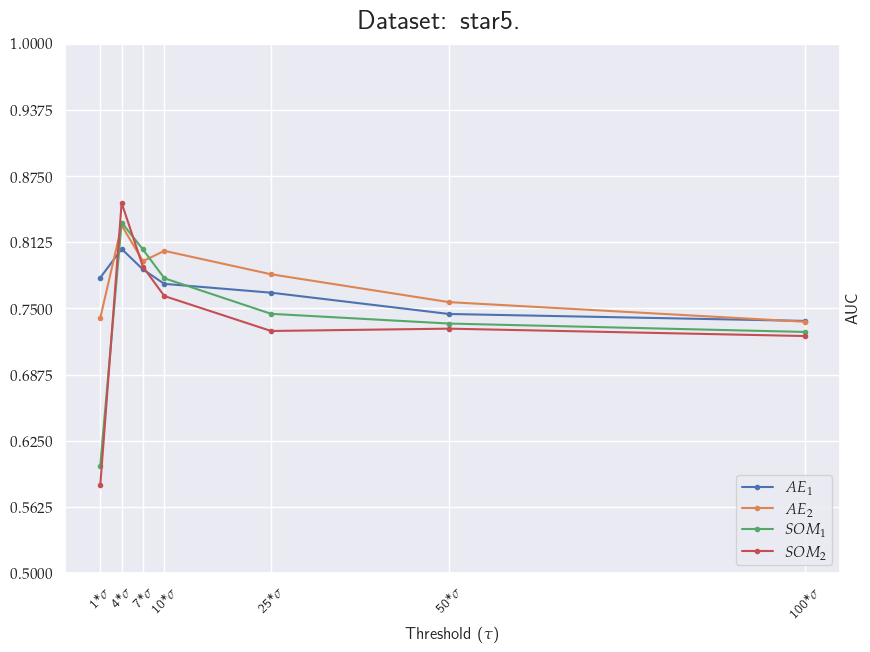

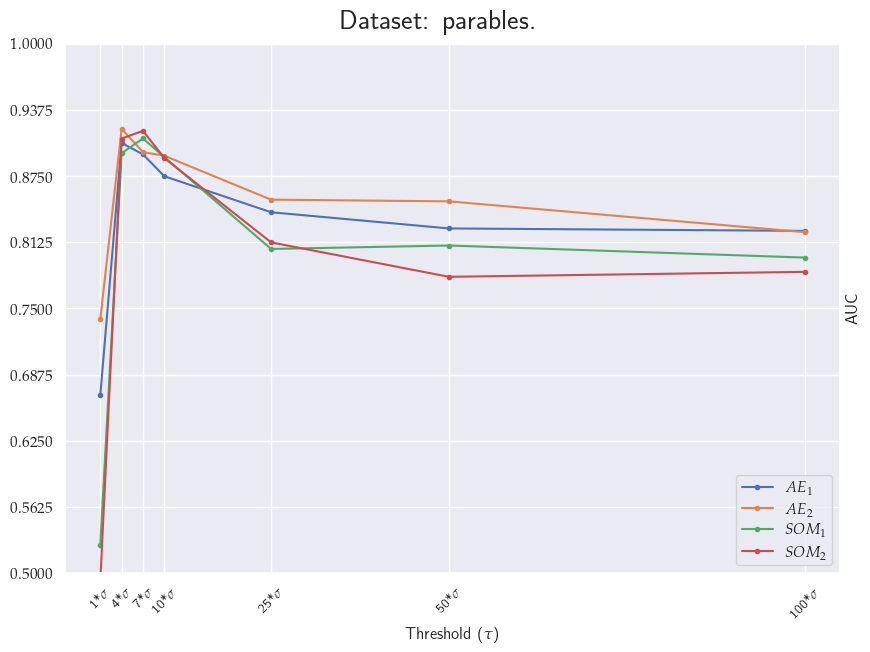

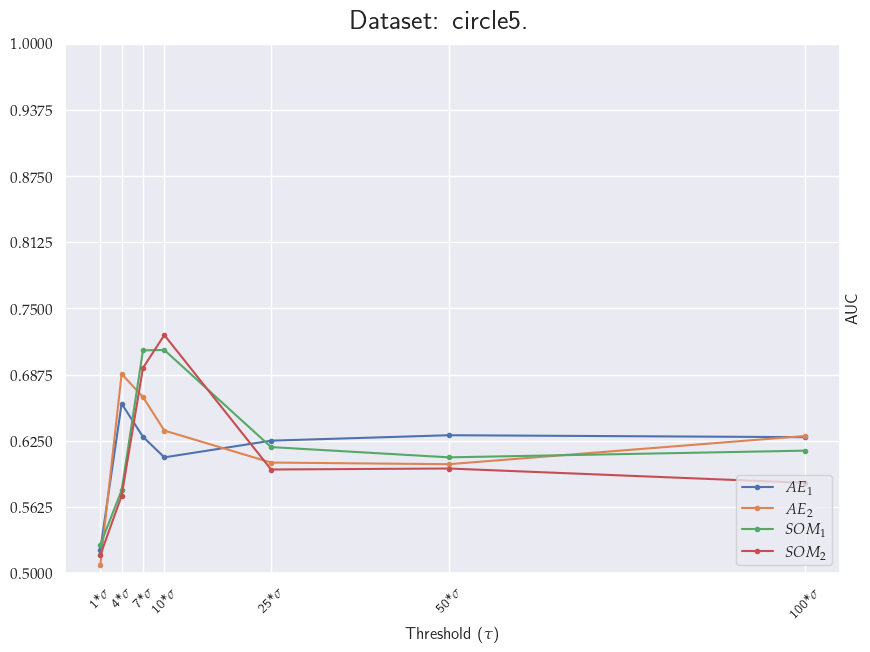

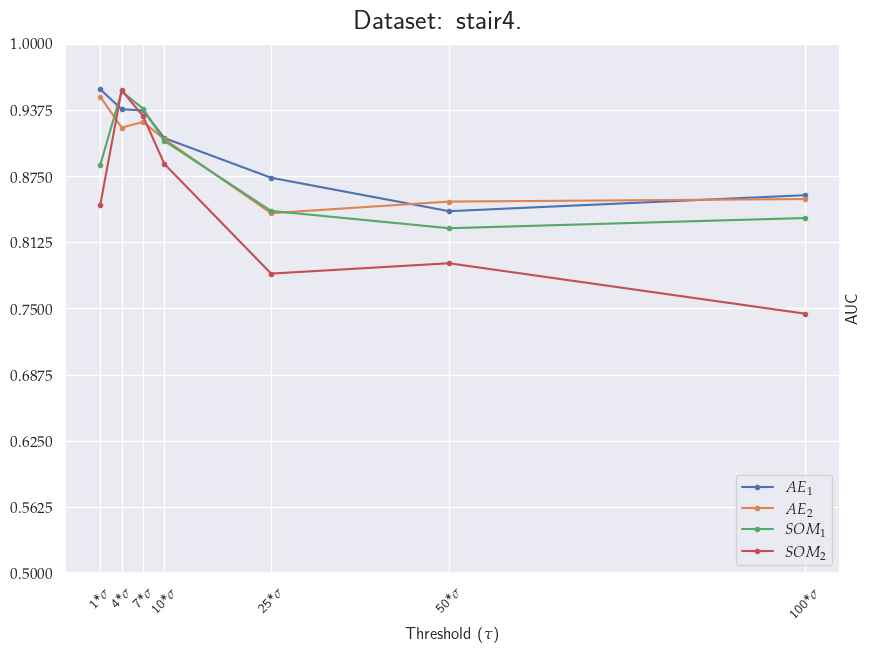

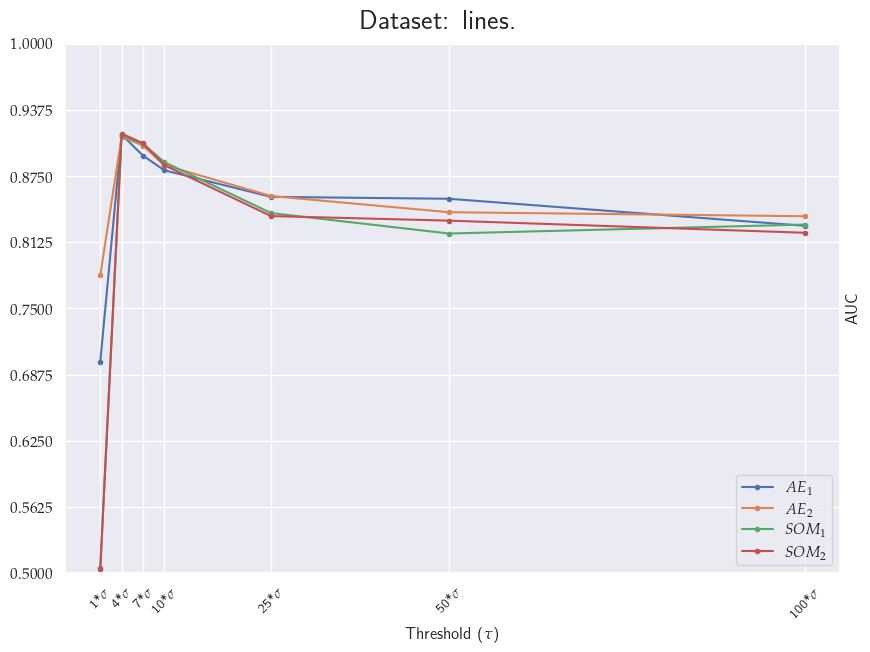

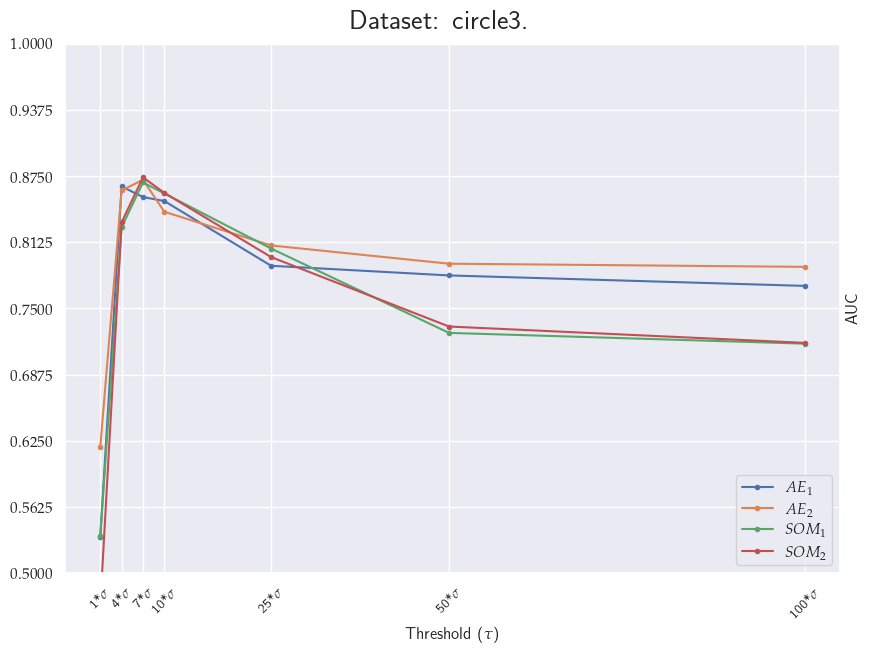

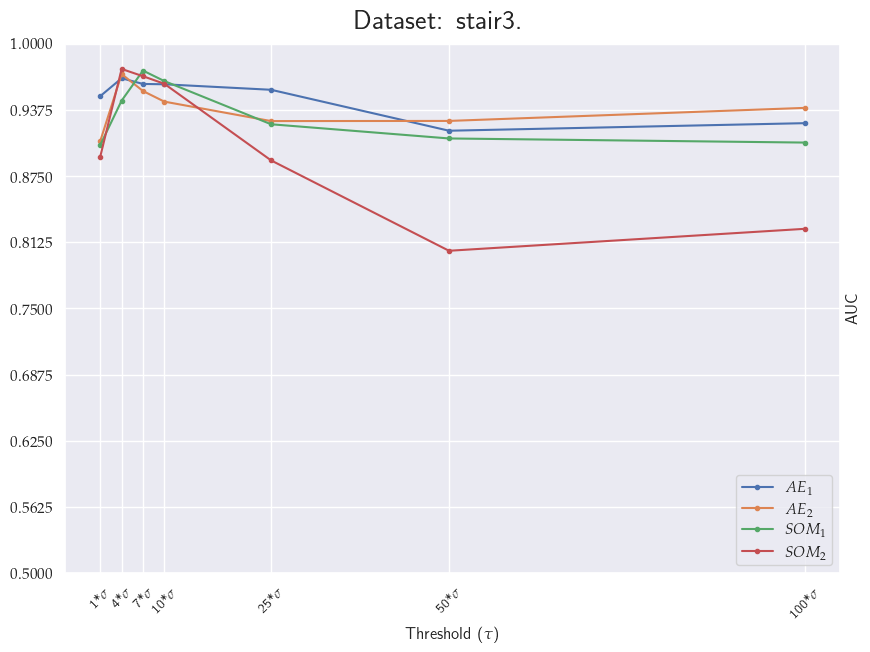

In [37]:
models = [(r"$AE_1$", best_ae_24142), (r"$AE_2$", best_ae_2841482),
          (r"$SOM_1$", som_110), (r"$SOM_2$", som_55)]

make_final_aucs(models=models, to_plot=True, to_save=True)


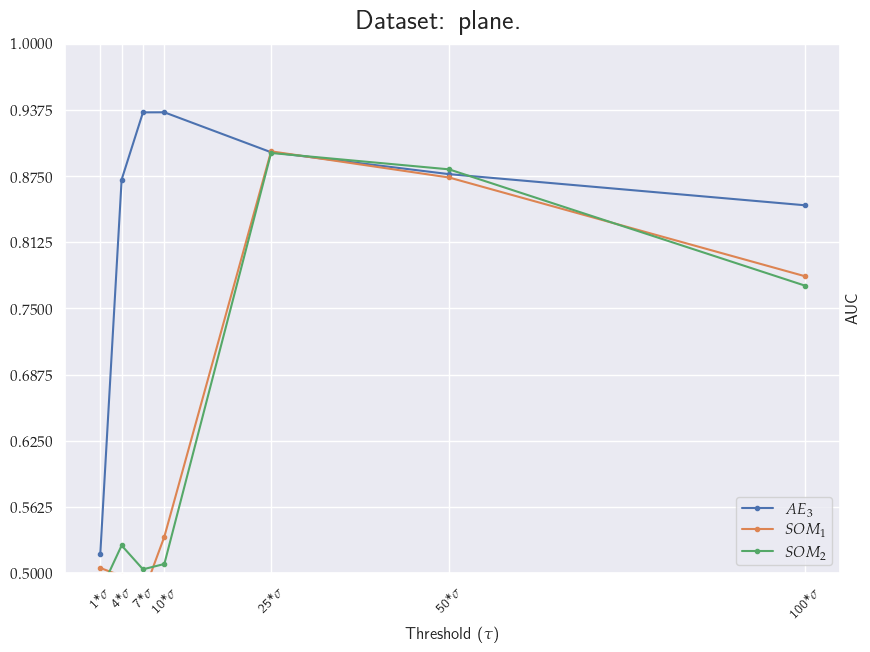

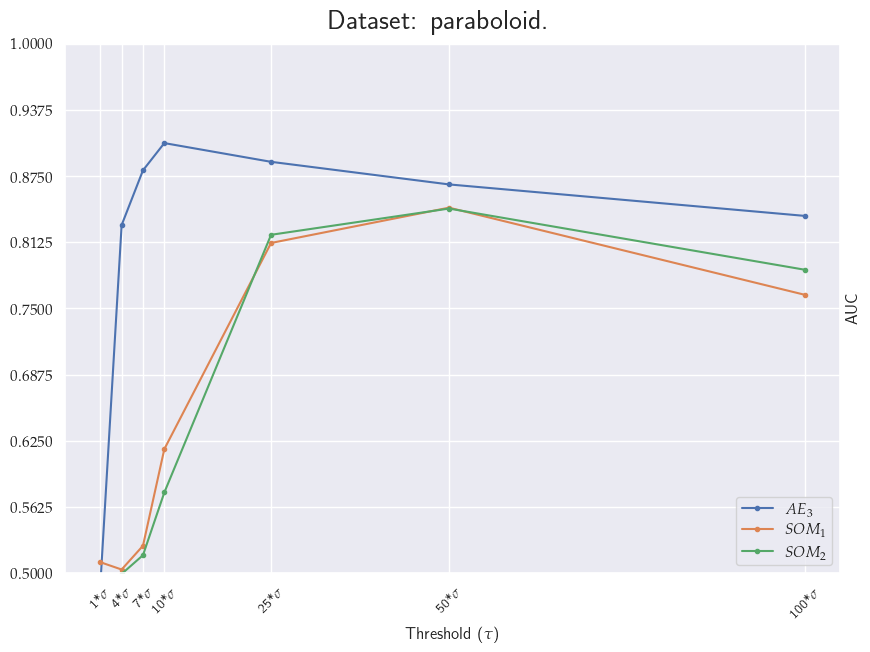

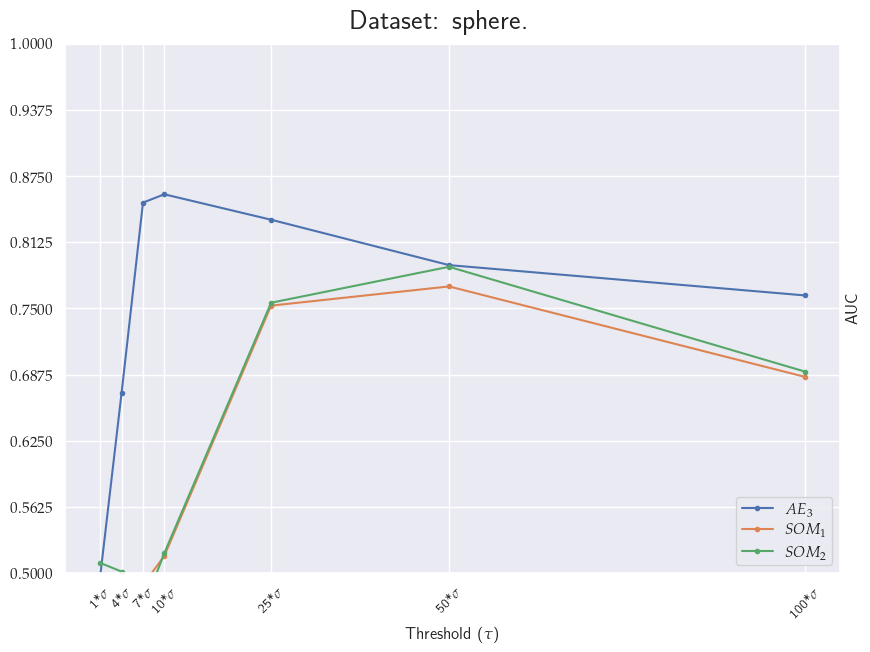

In [38]:
models = [(r"$AE_3$", ae_3952_3d), (r"$SOM_1$",
                                    som_55_3d), (r"$SOM_2$", som_110_3d)]

make_final_aucs(models=models, to_plot=True)
